# Predicting the Price of Used Cars

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [2]:
# Loading the data
car_dataset = pd.read_csv("car data.csv")
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Shape of the data 
car_dataset.shape

(301, 9)

In [4]:
# Dataframe information
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# Exploring the columns
print(car_dataset['Fuel_Type'].value_counts())
print()
print(car_dataset['Seller_Type'].value_counts())
print()
print(car_dataset['Transmission'].value_counts())
print()
print(car_dataset['Owner'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64

0    290
1     10
3      1
Name: Owner, dtype: int64


In [6]:
car_dataset.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


## Check for any missing value in data set and treat it

In [7]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

It's good that we don't have any null values in our data

In [8]:
# to know how old the car is we subtract current year with the year in which the car was bought
car_dataset['Years_old'] = 2020 - car_dataset.Year

#It's time to drop the Year column after the needed info is derived.
car_dataset.drop(['Year'],axis=1,inplace=True)

In [9]:
car_dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


# Data Exploration

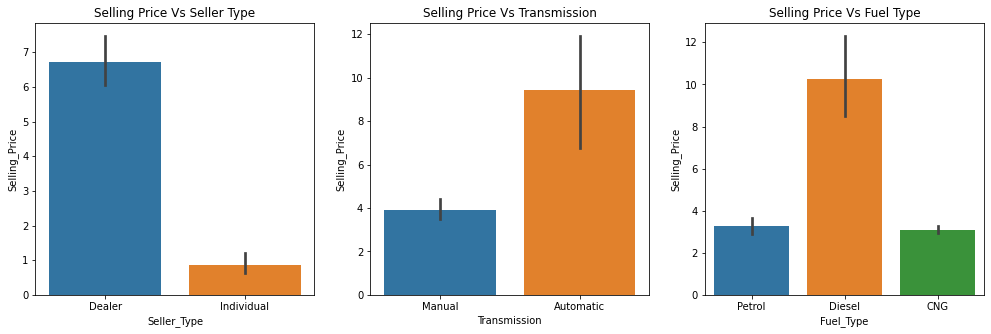

In [10]:
# Checking relation of target variable (Sellling_Price) with Seller_Type, Transmission, and Fuel_Type through visualization
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(car_dataset['Seller_Type'], car_dataset['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(car_dataset['Transmission'],car_dataset['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(car_dataset['Fuel_Type'],car_dataset['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

   - Cars sold by Dealers seems to have higher Selling_Prices as compared to Individuals.
   - It can be observed that Selling Price would be higher for cars that are Automatic as compared to Manual.
   - Those cars which have fuel type as Diesel seems to have higher prices as compared to Petrol and CNG.

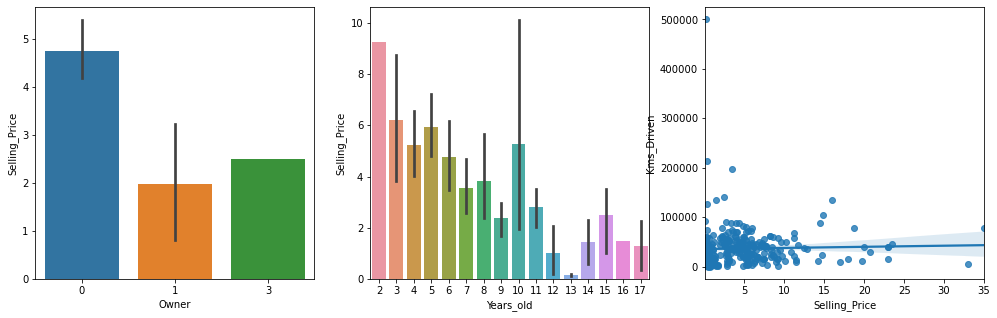

In [11]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(car_dataset['Owner'],car_dataset['Selling_Price'])

plt.subplot(1,3,2)
sns.barplot(car_dataset['Years_old'],car_dataset['Selling_Price'])

plt.subplot(1,3,3)
sns.regplot(car_dataset['Selling_Price'],car_dataset['Kms_Driven'])
plt.show()

   - Selling price seems higher with less Owners used cars.
   - Selling Price decreses gradually as the year increases, from 4 years old to 19 years old.
   - Lesser the Kms driven higher the Selling Price.

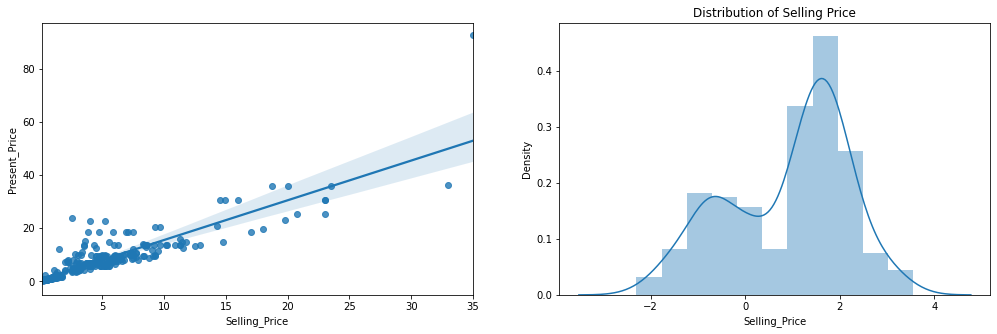

In [12]:
plt.figure(figsize=[17,5])
plt.subplot(1,2,1)
sns.regplot(car_dataset['Selling_Price'],car_dataset['Present_Price'])

plt.subplot(1,2,2)
sns.distplot(np.log(car_dataset['Selling_Price']))
plt.title('Distribution of Selling Price')

plt.show()

   - Selleing price tends to increase as present price.

##### Dealing With Categorical Variables

In [13]:
# Droping the car name column as its hard to implement and use in regression problem with many unique entries.
car_dataset = car_dataset.drop(['Car_Name'],axis=1)

In [14]:
# One Hot Encoding to treat Categorical data parameters(turns your categorical data into a binary vector representation)
newCar_dataset = pd.get_dummies(car_dataset,drop_first = True)
newCar_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


# Checking multicollinearity using VIF 

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = newCar_dataset.iloc[:,1:]

vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif

,Features,VIF
0,Present_Price,3.201728
1,Kms_Driven,2.892026
2,Owner,1.087990
3,Years_old,8.540393
4,Fuel_Type_Diesel,4.714762
5,Fuel_Type_Petrol,13.341429
6,Seller_Type_Individual,2.230179
7,Transmission_Manual,8.368965


In [16]:
# Years_old and Fuel_Type_Petrol feature has high VIF, now we will see pairwise correlation between variables.
corr_matrix = newCar_dataset.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
Years_old                -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

In [17]:
# We can see in pairwise correlation that Fuel_Type_Petrol and Kms_Driven has lower value as compare to Years_old,
# so we will drop those columns.
newCar_dataset = newCar_dataset.drop(['Fuel_Type_Petrol','Kms_Driven'],axis=1)

In [18]:
# Checking again after removing correlated feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = newCar_dataset.iloc[:,1:]

vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif

,Features,VIF
0,Present_Price,2.456996
1,Owner,1.084141
2,Years_old,4.810633
3,Fuel_Type_Diesel,1.658039
4,Seller_Type_Individual,1.864471
5,Transmission_Manual,3.964982


   - Now its look good, We have VIF < 5 and hence there is no Multicollinearity occurrence in our model.

In [19]:
X = newCar_dataset.drop('Selling_Price', axis = 1)
Y = newCar_dataset['Selling_Price']
print(X.shape)
print(Y.shape)

(301, 6)
(301,)


##### Checking for important features

In [20]:
# Feature importance gives you a score for each feature of your data, the higher the score more important or relevant 
# is the feature towards our Target variable.
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [21]:
model.feature_importances_

array([0.39705888, 0.00090707, 0.10575324, 0.23096687, 0.13556798,
       0.12974596])

<AxesSubplot:>

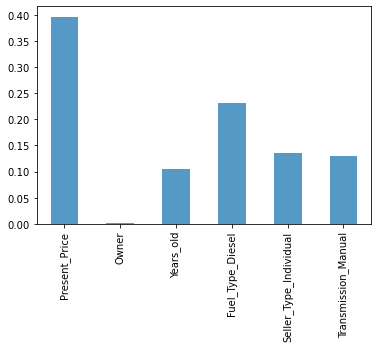

In [22]:
pd.Series(model.feature_importances_,index=X.columns).plot(kind='bar',alpha=0.75,rot=90)

# Model Evaluation

##### Train - Test splitting

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 42)

In [24]:
X_train.head()

,Present_Price,Owner,Years_old,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
282,14.00,0,6,1,0,1
163,0.95,0,10,0,1,1
42,7.15,0,12,0,0,1
17,10.79,0,4,1,0,1
266,7.00,0,6,0,0,1


# Selecting a desired model for DragonRealEstates

# 1 - Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
#loading Linear Regression Model
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train,Y_train)

#Prediction on Testing Data
training_data_prediction_lr = lin_reg_model.predict(X_train)

#R squarred error for our model evaluation
error_score = metrics.r2_score(Y_train,training_data_prediction_lr)
rmse = np.sqrt(metrics.mean_squared_error(Y_train,training_data_prediction_lr))
print("R_squared :",error_score)
print("RMSE :",rmse)

R_squared : 0.8833645728428189
RMSE : 1.7711334279164754


# 2 - Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

# Training Model
rf_model.fit(X_train,Y_train)

# Model Summary
training_data_prediction_rf = rf_model.predict(X_train)

#R squarred error for our model evaluation
error_score = metrics.r2_score(Y_train,training_data_prediction_rf)
rmse = np.sqrt(metrics.mean_squared_error(Y_train,training_data_prediction_rf))
print("R_squared :",error_score)
print("RMSE :",rmse)

R_squared : 0.988641371953766
RMSE : 0.5527121058584226


# 3 - Lasso regression

In [27]:
#loading Lasso Regression Model
lasso_reg_model = Lasso()

lasso_reg_model.fit(X_train,Y_train)

#Prediction on Traing Data
training_data_prediction_lasso = lasso_reg_model.predict(X_train)

#R squarred error for our model evaluation
error_score = metrics.r2_score(Y_train,training_data_prediction_lasso)
rmse = np.sqrt(metrics.mean_squared_error(Y_train,training_data_prediction_lasso))
print("R_squared :",error_score)
print("RMSE :",rmse)

R_squared : 0.8449110465301957
RMSE : 2.0423326037869014


In [28]:
some_data = X_train.iloc[:5]
some_labels = Y_train.iloc[:5]

In [29]:
rf_model.predict(some_data)

array([8.5015    , 0.45925   , 2.106     , 7.817     , 3.87329167])

In [30]:
list(some_labels)

[8.25, 0.45, 1.95, 7.75, 3.65]

##### *So as we tried diferent Regression Alorithms and found that "Random Forest Regressor Model" is giving better accuracy compare to other.*

# Hyperparameter optimization using RandomizedSearchCV

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200,num=12)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum distance between root to leaf node
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [32]:
# Random search of parameters
rf_randomized = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 10, cv = 5,verbose = 2, random_state = 42, n_jobs = 1)

In [33]:
rf_randomized.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [34]:
# Checking the best parameters for our model
rf_randomized.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [35]:
rf_randomized_predictions = rf_randomized.predict(X_train)

In [36]:
#R squarred error for our model evaluation
error_score = metrics.r2_score(Y_train,rf_randomized_predictions)
rmse = np.sqrt(metrics.mean_squared_error(Y_train,rf_randomized_predictions))
print("R_squared :",error_score)
print("RMSE :",rmse)

R_squared : 0.9829625990327112
RMSE : 0.6769205677079533


# Testing the model on test data

In [37]:
final_predictions = rf_randomized.predict(X_test)
error_score = metrics.r2_score(Y_test,final_predictions)
rmse = np.sqrt(metrics.mean_squared_error(Y_test,final_predictions))
print("R_squared :",error_score)
print("RMSE :",rmse)

R_squared : 0.9265840546092761
RMSE : 1.0463983270332748


#### Visualization of our model predictions data

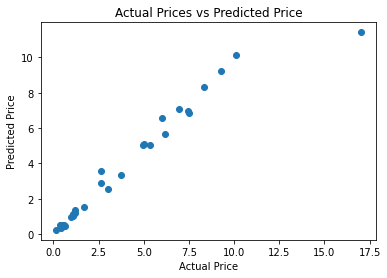

In [38]:
plt.scatter(Y_test,final_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

# Saving the model

In [39]:
import pickle
pickle.dump(rf_randomized, open('carPricePrediction', 'wb'))

# Loading the model to use it.
model = pickle.load(open('carPricePrediction','rb'))

# Using the model

In [40]:
def predictions(PresentPrice,YearsOld,Owner,FuelType,SellerType,TransmissionManual):
    price = float(PresentPrice)
    age = int(YearsOld)
    owner = int(Owner)
    fuel = int(FuelType)
    Seller = int(SellerType)
    trans = int(TransmissionManual)
    
    return model.predict([[price,age,owner,fuel,Seller,trans]])

In [41]:
predictions(25, 14,1, 0, 2, 0)

array([10.4951465])

In [42]:
predictions(14, 4,1, 0, 1, 1)

array([5.20619333])

# Conclusions

- Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
- Car age is effecting negatively as older the car lesser the Selling Price.
- Selling Price of cars with Fuel type Diesel is higher.
- Car of Manual type is of less priced whereas of Automatic type is high.
- Cars sold by Individual tend to get less Selling Price when sold by Dealers.